<a href="https://colab.research.google.com/github/SU-sumico/dlj/blob/main/5_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

目的
* ネコの画像データに対してセマンティック セグメンテーションを行う。

準備
* GPUを用いて処理を行うために、上部のメニューバーの「ランタイム」→「ランタイムのタイプを変更」からハードウェアアクセラレータをGPUにしてください。

使用するデータセット
* データセットは、RGBカラーの画像、ネコとイヌのクラスに分類されています。
https://www.kaggle.com/datasets/karakaggle/kaggle-cat-vs-dog-dataset?resource=download

データの準備
* アノテーションしたデータを実験用に加工します。

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import json
import os
import glob
import shutil

# 画像関係
import numpy as np
import cv2
from PIL import Image

# 画像表示
import matplotlib.pyplot as plt

IMAGE_SIZE = 256

glob.glob
* 指定したディレクトリ内のすべてのjsonファイルを取得します。

replaceメソッドを使って置換

In [ ]:
# データのリスト
json_list = glob.glob('/content/drive/MyDrive/Deep learning/cat_segmentation/cats/*.json')
img_list = [f.replace('json', 'jpg') for f in json_list]
print(len(json_list))

120


データを1つ読み込みます。

In [ ]:
no = 1

# アノテーションデータ読み込み
with open(json_list[no]) as f:
    data = json.loads(f.read())

# 1つだけ取り出す
shape = data['shapes'][0]
label = shape['label']
points = shape['points']
shape_type = shape['shape_type']
print('[label]', label)
print('[shape_type]', shape_type)
print('[points]', points)

[label] cat
[shape_type] polygon
[points] [[150.02941176470586, 179.77941176470586], [159.95588235294116, 159.92647058823528], [178.70588235294116, 130.51470588235293], [191.94117647058823, 109.55882352941175], [193.77941176470586, 76.47058823529412], [191.94117647058823, 42.27941176470588], [199.2941176470588, 30.882352941176467], [206.27941176470586, 48.16176470588235], [227.60294117647055, 54.77941176470588], [227.60294117647055, 31.617647058823525], [232.38235294117646, 20.220588235294116], [235.69117647058823, 3.3088235294117645], [241.5735294117647, 1.4705882352941175], [258.85294117647055, 5.514705882352941], [259.95588235294116, 11.397058823529411], [252.9705882352941, 37.5], [254.0735294117647, 52.94117647058823], [270.25, 55.882352941176464], [285.3235294117647, 60.66176470588235], [298.19117647058823, 52.205882352941174], [309.2205882352941, 41.17647058823529], [315.4705882352941, 41.17647058823529], [319.88235294117646, 58.8235294117647], [315.10294117647055, 80.51470588235

label: 今回はcatですが、囲った領域につけたラベル名

shape_type: ポリゴン以外にもポイントや四角などがあります

points: ポリゴンの各ポイント

cv2.imread()で画像ファイルから読み込み

OpenCVの関数imread()で画像ファイルを読み込むと色の順番がBGR（青、緑、赤）になる。cvtColor()でBGRとRGBを変換

numpy.zeros: https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
* このメソッドは、すべての要素の値が 0 の配列を生成します。

cv2.fillPoly: http://opencv.jp/opencv-2svn/cpp/drawing_functions.html#cv-fillpoly
* 内部を塗りつぶした多角形を描画したい場合はcv2.fillPoly()を使います。
* 参考: https://qiita.com/JarvisSan22/items/eaf82e23bf091d1ba949

fig.add_subplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html
* 例：ax_1 = fig.add_subplot(1, 1, 1) # １行１列の１番目の位置にグラフを作成: https://stats.biopapyrus.jp/python/subplot.html

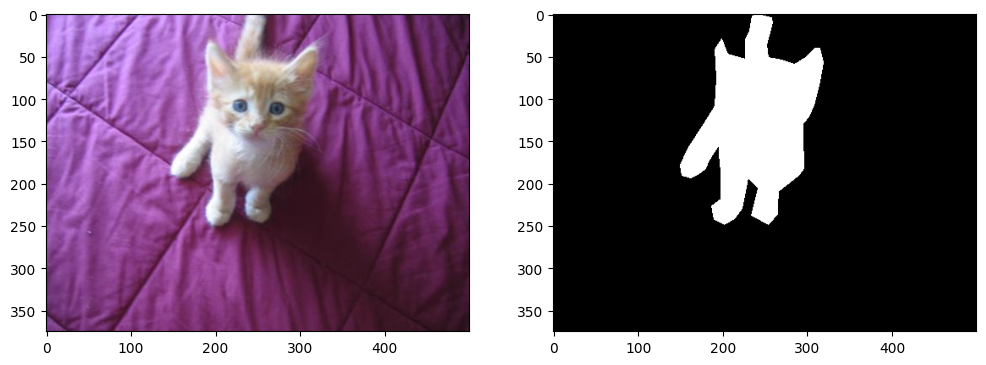

In [ ]:
# 画像読み込み
img = cv2.imread(img_list[no])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# アノテーション部分
mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
mask = cv2.fillPoly(mask, np.int32([points]), 1)

# 横並びに表示
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.imshow(img)
ax2.imshow(mask, cmap='gray')

In [ ]:
# フォルダ作成 trainとvalにデータを分けます
train_dir = '/content/drive/MyDrive/Deep learning/cat_segmentation/train'
val_dir = '/content/drive/MyDrive/Deep learning/cat_segmentation/val'
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    os.mkdir(train_dir + '/images')
    os.mkdir(train_dir + '/masks')
if not os.path.exists(val_dir):
    os.mkdir(val_dir)
    os.mkdir(val_dir + '/images')
    os.mkdir(val_dir + '/masks')

enumerate()関数を使ったforループ: https://note.nkmk.me/python-enumerate-start/
* enumerate()関数の引数にリストなどの「イテラブルオブジェクト」を指定します。「イテラブルオブジェクト」とは、for文などで要素を1つずつ取り出して処理できるような（通常、複数の要素からなる）オブジェクト

points.append: https://sorabatake.jp/19113/

cv2.fillPoly: https://note.nkmk.me/python-opencv-draw-function/

cv2.fillPoly: http://opencv.jp/opencv-2svn/cpp/drawing_functions.html
* 内部を塗りつぶした多角形を描画したい場合は、cv2.fillPoly()を使う。

In [ ]:
# 120個のデータを用意したので 100 と 20 に分けます
for ind, file in enumerate(json_list):
    points = []
    with open(file) as f:
        data = json.loads(f.read())
        for s in data['shapes']:
            points.append(s['points'])

    if points:
        # 画像データを読み込み画像サイズ取得
        img_path = file.replace('json', 'jpg')
        img = cv2.imread(img_path)

        # ファイル名
        file_name = os.path.basename(img_path)

        # jsonのアノテーションデータ
        # ねこ：1
        # 背景：0
        mask = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
        for p in points:
            mask = cv2.fillPoly(mask, np.int32([p]), 1)

        # リサイズ
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
        mask = cv2.resize(mask, (IMAGE_SIZE, IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)

        # 保存
        file_name = file_name.replace('jpg', 'png')
        if ind<100:
            maskim = Image.fromarray(np.uint8(mask))
            maskim.save(f'/content/drive/MyDrive/Deep learning/cat_segmentation/train/masks/{file_name}')
            cv2.imwrite(f'/content/drive/MyDrive/Deep learning/cat_segmentation/train/images/{file_name}', img)
        else:
            maskim = Image.fromarray(np.uint8(mask))
            maskim.save(f'/content/drive/MyDrive/Deep learning/cat_segmentation/val/masks/{file_name}')
            cv2.imwrite(f'/content/drive/MyDrive/Deep learning/cat_segmentation/val/images/{file_name}', img)